<a href="https://colab.research.google.com/github/mahsamir/Hello-world/blob/master/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1- Importing DataSet**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#importing our dataSet
from google.colab import files
uploaded = files.upload()

Saving DataSet_Kaggle_Insurance.csv to DataSet_Kaggle_Insurance (1).csv


In [ ]:
import io
Data = pd.read_csv(io.BytesIO(uploaded['DataSet_Kaggle_Insurance.csv']))
Data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#Get some information about our Data-Set
Data.info()
Data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1330 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1330.000000,1338.000000,1338.000000
mean,39.207025,30.651744,1.094918,13270.422265
std,14.049960,6.094556,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.380000,1.000000,9382.033000
75%,51.000000,34.600000,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


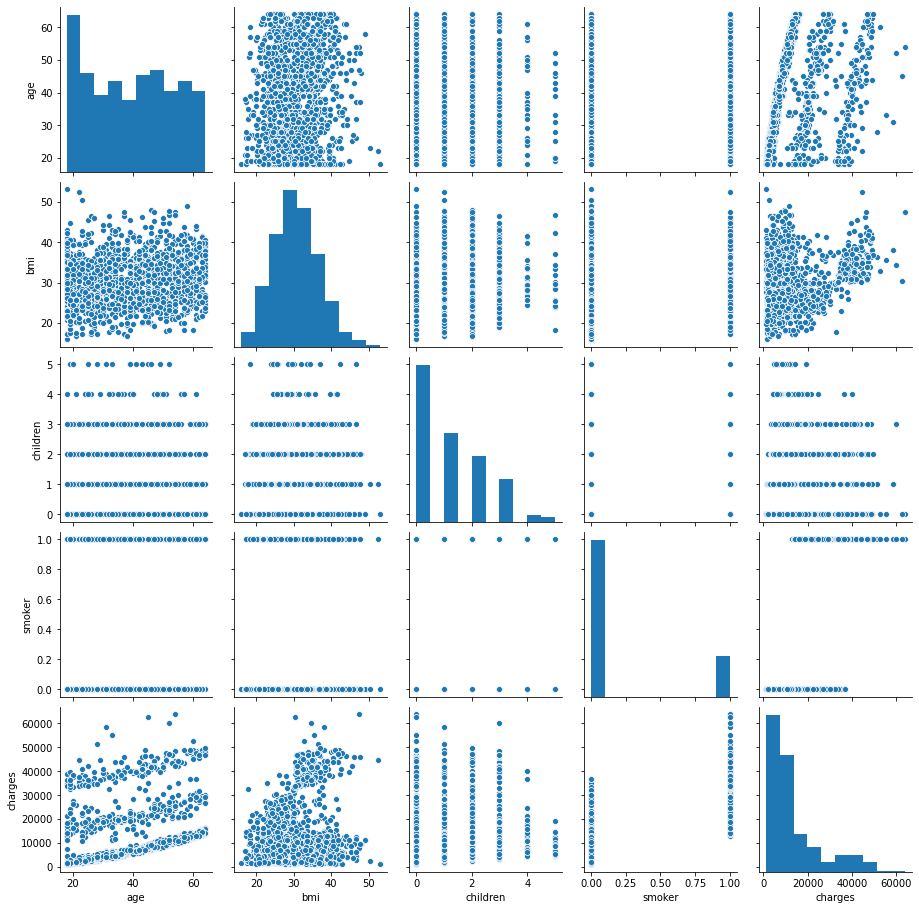

In [ ]:
#visualize Data to see what we have
sns.pairplot(Data['age bmi children smoker charges'.split()])


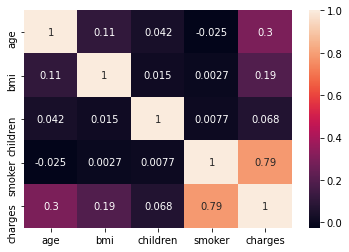

In [ ]:
#relationship between different variables
sns.heatmap(Data['age bmi children smoker charges'.split()].corr(), annot=True,)

# **2- Data preparation**

## **Handling of Missing Data**

In [ ]:
# check how many values are missing (NaN)
Data.isnull().sum()

age         0
sex         0
bmi         8
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
#fill the missing values (NaN) by mean of the column
Data['bmi'].fillna(Data['bmi'].mean(), inplace = True)

In [ ]:
# double check how many values are missing (NaN) after filling
Data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## **Handling of Categorical Data**

In [ ]:
# import required libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# check the Data-Set
Data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### **Label Encoding**
when we have two distinct values in our Data-Set: Sex(Male/Female)- Smoker (Yes/No)

In [ ]:
# using Label Encoder for converting sex and smoker columns to numerical
labelencoder = LabelEncoder()
Data['sex'] = labelencoder.fit_transform(Data['sex'])
Data['smoker'] = labelencoder.fit_transform(Data['smoker'])
Data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


### **On Hot Encoding**
when we have three or more distinct values in our Data-Set: Region(southwest/southeast/northwest/northeast)

In [ ]:
# using One-Hot Encoding for covnverting region column
ohe = OneHotEncoder()
ohe_Data = pd.DataFrame(ohe.fit_transform(Data[['region']]).toarray())
ohe_Data.columns = 'northeast northwest southeast southwest'.split()

# merge  main Data with Ohe_Data
Data = Data.join(ohe_Data)

In [ ]:
Data.head()

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,southeast,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,southeast,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,northwest,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,northwest,3866.85520,0.0,1.0,0.0,0.0


## **Splitting the Data-Set**
Data is divided into Training set and Test set, we use Train set to make the algorithm learn the data's behavior and then will check the accuracy of our algorithm by testing on Test set.


In [ ]:
#define X variables and our target(y)
X = Data.drop(['charges', 'region'],axis = 1)
y = Data['charges']

# another way!
#X = Data.iloc[:,:-1].values
#Y = Data.iloc[:,-1].values

#splitting Train and Test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

## **Feature Scaling**
Feature scaling would help us to have a fair glass to see all the variables from the same lens (all variables in the same scale)

### **Nomalization**

In [ ]:
# normalized scaler - fit&transform on train, fit only on test
from sklearn.preprocessing import MinMaxScaler
n_scaler = MinMaxScaler()
X_train = n_scaler.fit_transform(X_train.astype(np.float))
X_test = n_scaler.transform(X_test.astype(np.float))

### **Standardization (recommended)**

In [ ]:
# standardization scaler - fit&transform on train, fit only on test
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

# **3- Data Modeling**

### **Simple Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

#training the simple Linear Regression model on the training set
lr = LinearRegression()
lr.fit(X_train,y_train)

#predicting the test set result
ytest_Predict = lr.predict(X_test)
ytrain_Predict = lr.predict(X_train)

print('Linear Regression Model:')
print("Train Score {:.2f}".format(lr.score(X_train,y_train)))
print("Train Score {:.2f}".format(lr.score(X_test, y_test)))


Linear Regression Model:
Train Score 0.73
Train Score 0.78


In [ ]:
#evaluate the model - checking Coefficient and constant
print(lr.intercept_)
print(lr.coef_)

X.columns
Data_val = pd.DataFrame(lr.coef_,X.columns,columns = ['coeff'])
Data_val

13121.872173082213
[ 3.60e+03  2.36e+01  1.95e+03  5.34e+02  9.12e+03 -5.01e+17 -5.09e+17
 -5.29e+17 -5.20e+17]


,coeff
age,3.599611e+03
sex,2.364001e+01
bmi,1.948676e+03
children,5.337047e+02
smoker,9.122063e+03
northeast,-5.014137e+17
northwest,-5.088418e+17
southeast,-5.288849e+17
southwest,-5.196399e+17


### **Polynomial Regression**

In [ ]:
# PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

X = Data.drop(['charges','region'],axis = 1)
y = Data['charges']

#training the simple Linear Regression model on the training set
poly = PolynomialFeatures (degree = 2)
X_poly = poly.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X_poly,y, test_size = 0.33, random_state = 0)

#standard scaler (fit transform on train, fit only on test)
sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(np.float))
X_test= sc.transform(X_test.astype(np.float))

#fit model
poly_lr = LinearRegression().fit(X_train,y_train)
y_train_pred = poly_lr.predict(X_train)
y_test_pred = poly_lr.predict(X_test)


print('Polynomial Regression Model:')
print("Train Score {:.2f}".format(poly_lr.score(X_train,y_train)))
print("Test Score {:.2f}".format(poly_lr.score(X_test, y_test)))




Polynomial Regression Model:
Train Score 0.83
Test Score 0.87


In [ ]:
print(poly_lr.intercept_)
print(poly_lr.coef_)

13083.997969765784
[ 5.91e-14  4.81e+14 -1.76e+15  2.16e+15  7.75e+15  2.68e+15 -8.20e+15
 -6.83e+15 -7.14e+15 -8.48e+15  3.64e+03  2.95e+02 -5.50e+02  1.65e+02
  1.59e+02 -6.22e+14 -6.36e+14 -6.49e+14 -6.32e+14 -1.97e+14  4.55e+02
 -3.52e+02 -1.14e+02  1.26e+15  1.26e+15  1.35e+15  1.28e+15 -2.20e+03
  3.34e+02  1.80e+04 -4.43e+15 -4.46e+15 -5.35e+15 -4.78e+15 -3.02e+02
 -2.88e+02 -4.71e+15 -4.72e+15 -4.84e+15 -5.43e+15  3.54e+15 -3.36e+15
 -3.17e+15 -3.92e+15 -3.01e+15 -8.45e+15  0.00e+00  0.00e+00  0.00e+00
 -1.01e+16  0.00e+00  0.00e+00 -1.04e+16  0.00e+00 -8.78e+15]


In [ ]:
residuals = y_train-y_train_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 29.780317231984277


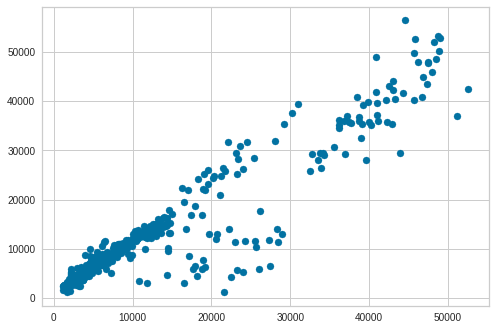

In [ ]:
# visualize our prediction
import matplotlib.pyplot as plt
plt.scatter(y_test,y_test_pred)

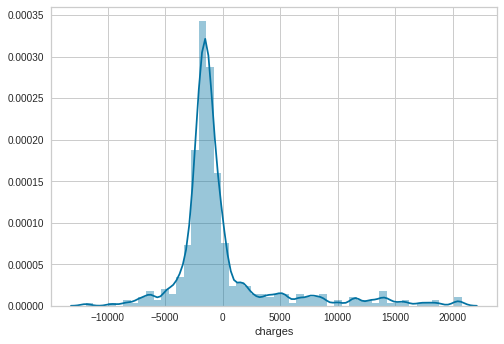

In [ ]:
import seaborn as sns
sns.distplot((y_test-y_test_pred))

Text(0.5, 1.0, 'Residuals vs fitted values plot for homoscedasticity check')

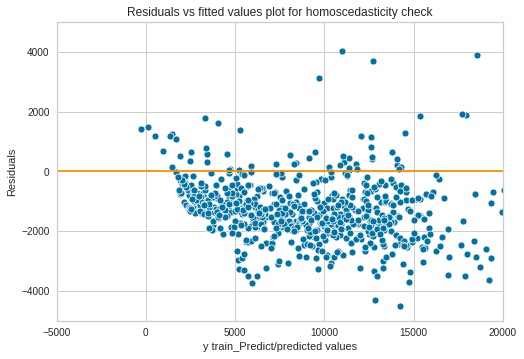

In [ ]:
sns.scatterplot(y_train_pred,residuals)
plt.xlabel('y train_Predict/predicted values')
plt.ylabel('Residuals')
plt.ylim(-5000,5000)
plt.xlim(-5000,20000)
sns.lineplot([-5000,20000],[0,0],color='darkorange')
plt.title('Residuals vs fitted values plot for homoscedasticity check')

0.8697150434120801

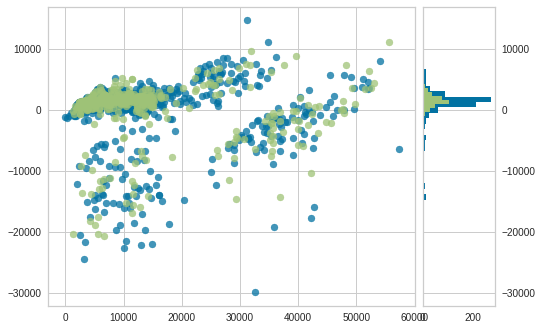

In [ ]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot


# Instantiate the linear model and visualizer
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
                # Finalize and render the figure

### **1- linearity**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


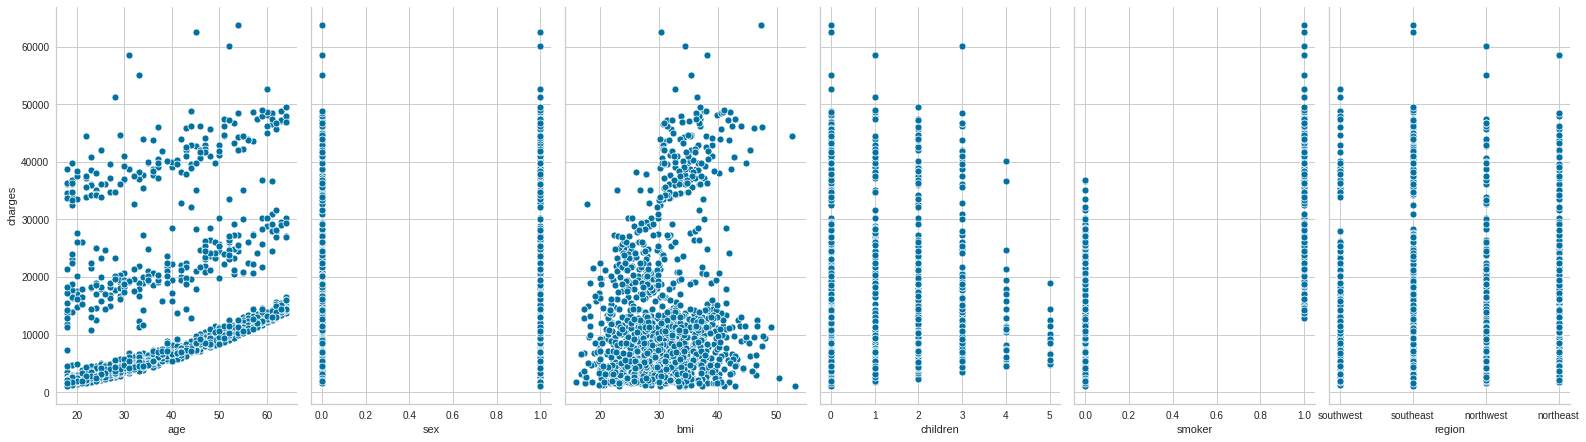

In [ ]:
# linearity 
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(Data, x_vars= 'age sex bmi children smoker region'.split(), y_vars='charges', size=6, aspect=0.6)

### **2- Mean of Residuals**

difference between true value and the predicted value
mean of residual should be zero

In [ ]:
residuals = y_train-ytrain_Predict
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -29.521341441587825


### **3- Check for Homoscedasticity**

Homoscedasticity means that the residuals have equal/almost equal variance across the regression line.
How to check it: plotting the error against the predicted value

Text(0.5, 1.0, 'Residuals vs fitted values plot for homoscedasticity check')

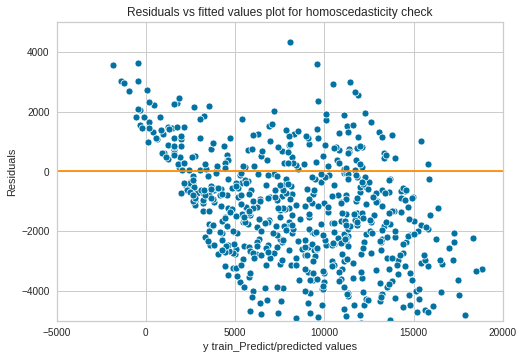

In [ ]:
sns.scatterplot(ytrain_Predict,residuals)
plt.xlabel('y train_Predict/predicted values')
plt.ylabel('Residuals')
plt.ylim(-5000,5000)
plt.xlim(-5000,20000)
sns.lineplot([-5000,20000],[0,0],color='darkorange')
plt.title('Residuals vs fitted values plot for homoscedasticity check')

**Check for for Normality of error Residuals**

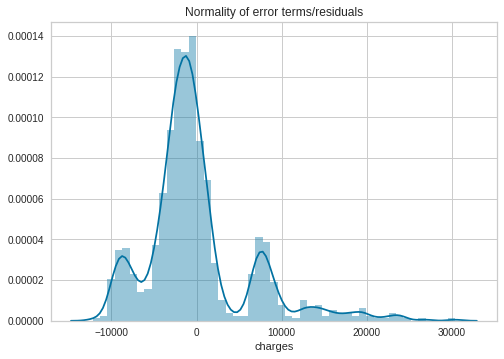

In [ ]:
sns.distplot(residuals,kde=True)
plt.title('Normality of error terms/residuals')

0.7856430542337652

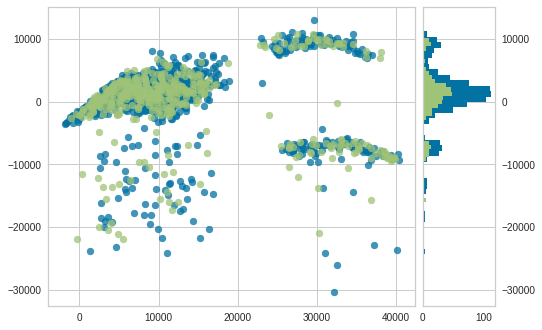

In [ ]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot


# Instantiate the linear model and visualizer
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
                # Finalize and render the figure